<a href="https://colab.research.google.com/github/HolyBayes/YSDA_GAN_school_2021/blob/main/pytorch-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch

Мы будем работать с pytorch версии 1.0 и выше, поэтому не забудьте это проверить

In [1]:
import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Начнем с небольшого сравнения с numpy

In [2]:
# Можем переносить np.array в torch.Tensor и обратно
# Следите за типами данных

np_arr = np.array([[1, 2, 3], [3, 2, 1]])
torch_tensor = torch.Tensor(np_arr)

print('numpy array \n', np_arr)
print('torch tensor \n', torch_tensor)
print('numpy array from torch tensor \n', torch_tensor.numpy())

numpy array 
 [[1 2 3]
 [3 2 1]]
torch tensor 
 tensor([[1., 2., 3.],
        [3., 2., 1.]])
numpy array from torch tensor 
 [[1. 2. 3.]
 [3. 2. 1.]]


In [3]:
# Базовые операции одинаковые как в numpy, так и в torch

np_arr = np.arange(25).reshape(5, 5)
torch_tensor = torch.arange(25).view(5, 5)
print(np_arr)
print(torch_tensor)


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])


In [4]:
# сумма

print(np_arr + 10)
print(torch_tensor + 10)

[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]
tensor([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]])


In [5]:
# Умножение

print(np.dot(np_arr, np_arr.T))
print(torch.matmul(torch_tensor, torch_tensor.permute(1, 0)))

# В torch нет удобного .T, поэтому приходится использовать .permute(1, 0), который меняет местами 0 и 1 axis

[[  30   80  130  180  230]
 [  80  255  430  605  780]
 [ 130  430  730 1030 1330]
 [ 180  605 1030 1455 1880]
 [ 230  780 1330 1880 2430]]
tensor([[  30,   80,  130,  180,  230],
        [  80,  255,  430,  605,  780],
        [ 130,  430,  730, 1030, 1330],
        [ 180,  605, 1030, 1455, 1880],
        [ 230,  780, 1330, 1880, 2430]])


In [6]:
# Среднее 

print(np.mean(np_arr, axis=1))
print(torch.mean(torch_tensor.float(), dim=1))

# Переводим во float потому что изначально torch_tensor типа Long, а по такому типу torch отказывается считать среднее


[ 2.  7. 12. 17. 22.]
tensor([ 2.,  7., 12., 17., 22.])


In [7]:
# Максимум

print(np.max(np_arr, axis=1))
print(torch.max(torch_tensor, dim=1))

# Здесь заметьте, что torch.max выдает не просто максимумы, а еще и индексы максимумов


[ 4  9 14 19 24]
torch.return_types.max(
values=tensor([ 4,  9, 14, 19, 24]),
indices=tensor([4, 4, 4, 4, 4]))


## NumPy vs Pytorch

```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
```

конвертация 

```
torch.from_numpy(x) -- вернет Tensor
x.numpy() -- вернет Numpy Array
```

Если тензор состоит из одного числа, то его можно достать и превратить в обычное питоновское:

```
torch.tensor([[[1]]]).item() -> 1
```


#### Задача

Посчитать $sin^2 (x) + cos^2 (x)$ и нарисовать график $sin(x)$ и $cos(x)$

In [8]:
x = torch.linspace(0, 2 * np.pi, 16, dtype=torch.float64)

# result = YOUR CODE

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE

plt.show()

# Automatic gradients

У каждого тензора в Pytorch есть флаг `requires_grad`, который отвечает за автоматическое вычисление градиентов:

1. Создать переменную: `a = torch.tensor(..., requires_grad=True)`

2. Определить какую-нибудь дифференцируемую функцию `loss = whatever(a)`

3. Запросить обратный проход `loss.backward()`

4. Градиенты будут доступны в `a.grads`


Есть два важных отличия Pytorch от TF/Keras:

1. Функцию ошибки можно изменять динамически, например на каждом минибатче.

2. После вычисления `.backward()` градиенты сохраняются в `.grad` каждой задействованной переменной, при повторных вызовах градиенты суммируются. Это позволяет использовать несколько функций ошибок или виртуально увеличивать batch_size. Поэтому, после каждого шага оптимизатора градиенты стоит обнулять.


In [11]:
# Обратите внимание, что вычисление градиентов работает только для тензоров с вещественным типом данных:
x = torch.tensor([1., 2., 3., 4.], requires_grad=True)

In [12]:
# Обратите внимание, что вычисление градиентов работает только для тензоров с вещественным типом данных:
x = torch.tensor([1., 2., 3., 4.], requires_grad=True)


Чтобы выставить флаг `requires_grad=False` и выключить автоматическое вычисление градиентов для нескольких тензоров, можно использовать `with torch.no_grad()` или `detach`:

In [13]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print('x.requires_grad', x.requires_grad)
print('y.requires_grad', y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print('torch.no_grad(), z.requires_grad', z.requires_grad)
    
# detach from the graph
w = torch.log(x).detach()
print('.detach(), w.requires_grad', w.requires_grad)

x.requires_grad True
y.requires_grad True
torch.no_grad(), z.requires_grad False
.detach(), w.requires_grad False


### Пример

Рассмотрим пример линейной регрессии на датасете Boston. Будем предсказывать цену дома только по последнему признаку

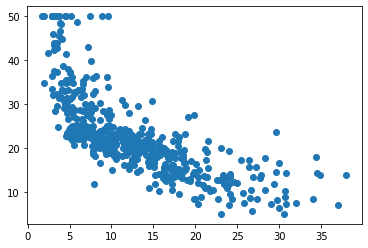

In [14]:
from sklearn.datasets import load_boston

x, y = load_boston(return_X_y=True)
x = x[:, -1]

plt.scatter(x, y)

##### Задача:

Стандартизируйте x и y. (сначала вычтите среднее, а потом разделите на std)

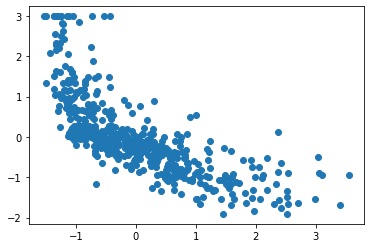

In [15]:
# Разделим x и y на их std, чтобы было проще

x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

# x = YOUR CODE
# x = YOUR CODE

plt.scatter(x, y)

In [16]:
# Определим веса нашей регрессии

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Обернем наши данные в torch tensor
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

# Видно что x и y не требуют вычисления градиентов. 
# Логично, потому что мы бы не хотели менять данные, чтобы уменьшить ошибку
for vec in [w, b, x, y]:
    print(vec.is_leaf, vec.requires_grad)
    

True True
True True
True False
True False


#### Задача: 

Постройте регрессию. Напишите функцию, которая считает MSE.

У вас есть:
1. вес признака - w
2. bias - b
3. значения признака - x
4. таргет - y

In [17]:
y_pred = w * x + b

def MSE(y_pred, y):
    return torch.mean((y_pred - y)**2)


mse = MSE(y_pred, y)

# Когда мы делаем .backward(), в параметрах нашей модели появляется атрибут .grad

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

# В тензорах с requires_grad=False .grad так и остался None

print("Non-Leaf x dL/dx = \n", x.grad)
print("Non-Leaf loss dL/dpred = \n", y_pred.grad)

dL/dw = 
 None
dL/db = 
 None
Non-Leaf x dL/dx = 
 None
Non-Leaf loss dL/dpred = 
 None


<ipython-input-17-845101658fd4>:17: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print("Non-Leaf loss dL/dpred = \n", y_pred.grad)


# Линейная регрессия

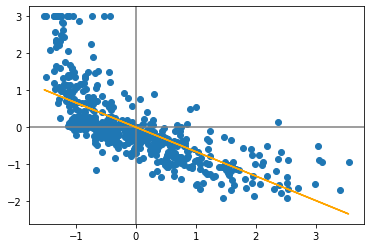

  5%|▌         | 10/200 [00:00<00:09, 19.44it/s]

loss =  0.4621272385120392
Done!


In [18]:
from IPython.display import clear_output
import tqdm

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

for i in tqdm.tqdm(range(200)):
    
    y_pred = w * x  + b
    loss = MSE(y_pred, y)
    
    loss.backward()
    
    # Делаем градиентный шаг для параметров модели

    learning_rate = 0.1
    w.data = w.data - w.grad * learning_rate
    b.data = b.data - b.grad * learning_rate
    
    # Не забываем обнулить градиенты
    w.grad.zero_()
    b.grad.zero_()
    
    # Здесь рисуются красивые графики
    if i % 5==0:
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

# Optimizers

В этом примере мы пользовались простым правилом для градиентного спуска:
  
$$W^{n+1} = W^{n} - \alpha \nabla_{{W^n}}L$$


Единственным параметром в нем является $\alpha$ -- это `learning_rate`.

На практике часто используют различные модификации (например [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) ):

Хороший обзор алгоритмов оптимизации для сетей можно посмотреть [тут](http://ruder.io/optimizing-gradient-descent/).


Оптимизаторы удобны в использовании:

- требуется указать список переменных для оптимизации
- `opt.step()` обновляет веса
- `opt.zero_grad()` сбрасывает градиенты





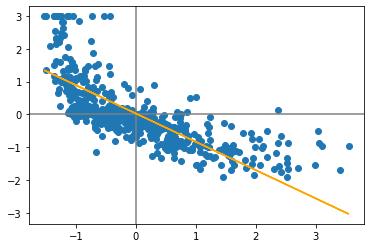

  5%|▌         | 10/200 [00:00<00:09, 20.40it/s]

loss =  0.4720018208026886
Done!


In [19]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optim = torch.optim.Adam([w, b], lr=0.1)

for i in tqdm.tqdm(range(200)):
    
    y_pred = w * x  + b
    loss = MSE(y_pred, y)
    
    loss.backward()
    
    # Делаем градиентный шаг для параметров модели
    optim.step()
    optim.zero_grad()
    
    # Здесь рисуются красивые графики
    if i % 5==0:
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

## Highlevel-API 

При переходе от одномерной линейной регрессии к более сложным моделям становится очень неудобно держать все переменные в голове, определять каждый слой отдельно и все такое. 

Главное приемущество Pytorch - его высокоуровневый [API](http://pytorch.org/docs/master/nn.html#torch.nn.Module), с помощью которого можно легко определить почти любую сеть

Чтобы воспользоваться моделью необходимо отнаследоваться от torch.nn.Module, определить слои и описать `forward`. `backward` и остальное - будут вычислены автоматически.


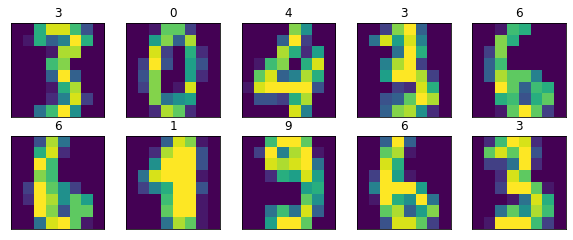

In [20]:
# MNIST again
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=2)

plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(zip(X_train[:10], y_train[:10])):
    plt.subplot(5, 5, index + 1)
    plt.imshow(image.reshape(8, 8))
    plt.yticks([])
    plt.xticks([])
    plt.title(str(label))
plt.show()

In [21]:
# Высокоуровневое определение сети

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_size=64, hidden_size=32, output_size=10):
        super(Net, self).__init__()
        # Здесь надо определить все слои которые будут у модели, в каждом указать размер входа и выхода
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = x.float()
        # Здесь надо определить в каком порядке применяются слои к данным
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # Софтмакс чтобы посчитать вероятности каждого класса
        return F.softmax(x, dim=-1)


Раз уж мы начали работать с высокоуровневым API, стоит упомянуть про DataLoader и Dataset

In [22]:
from torch.utils.data import DataLoader, Dataset

# Этот класс будет использоваться для того чтобы итерироваться по данным
class DigitSet(Dataset):
    def __init__(self, x, y):
        # Здесь просто сохраним аргументы x и y
        self.x = x
        self.y = y
        
    def __len__(self):
        # Чтобы итератор знал какого размера наш датасет (какие индексы запрашивать)
        return len(self.x)
    
    def __getitem__(self, index):
        # Итерируясь по датасету, мы вызываем эту функцию с разными индексами
        return self.x[index], self.y[index]
    

In [23]:
mnist_set = DigitSet(X_train, y_train)
image, label = next(iter(mnist_set))
print('image:', image.shape)
print('label:', label)

image: (64,)
label: 3


In [24]:
# DataLoader - удобная обертка над Dataset, позволяющая итерироваться батчами
train_loader = DataLoader(mnist_set, batch_size=32)

image, label = next(iter(train_loader))
print('image:', image.shape)
print('label:', label)

image: torch.Size([32, 64])
label: tensor([3, 0, 4, 3, 6, 6, 1, 9, 6, 3, 4, 6, 4, 6, 7, 2, 7, 6, 3, 0, 3, 0, 1, 3,
        6, 8, 0, 4, 3, 8, 4, 3])


In [26]:
# Создаем экземпляр класса, который мы описали сверху
model = Net()

for batch in train_loader:
    prediction = model(batch[0])
    break

print('Model outputs: \n', prediction.shape)

print('Pred: \n', torch.max(prediction, dim=1)[1].numpy())
print('Truth: \n', batch[1].numpy())

Model outputs: 
 torch.Size([32, 10])
Pred: 
 [8 7 8 8 8 8 8 7 8 8 8 8 5 8 8 7 8 8 6 9 8 7 8 7 7 7 7 8 7 7 8 9]
Truth: 
 [3 0 4 3 6 6 1 9 6 3 4 6 4 6 7 2 7 6 3 0 3 0 1 3 6 8 0 4 3 8 4 3]


Тренировка сети

Для тренировки сети нам требуется 
- итератор по данным -> DataLoader
- функция тренировки (прогон по данным, вычисление и применение градиентов)
- функция валидации (прогон по тестовым данным, вычисление метрик)

In [27]:
# кросс-энтропия
criterion = torch.nn.CrossEntropyLoss()

def train(x, y, optimizer, model, batchsize=32):
    losses = []
    model.train()
    loader = DataLoader(DigitSet(x, y), batch_size=batchsize)
    for x_batch, y_batch in loader:
        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

def test(x, y, model, batchsize=1):
    losses = []
    model.eval()
    loader = DataLoader(DigitSet(x, y), batch_size=batchsize)
    for x_batch, y_batch in loader:
        output = model(x_batch)
        loss = criterion(output, y_batch)
        losses.append(loss.item())
    return losses



In [28]:
def plot_history(index, train_history, val_history, title='loss'):
    plt.figure(figsize=(10, 10))
    plt.plot(train_history, label='train loss')
    plt.scatter([i*(len(X_train)//32) for i in range(index+1)], val_history, c='r', marker='o', label='test mean loss')
    plt.legend()
    plt.show()

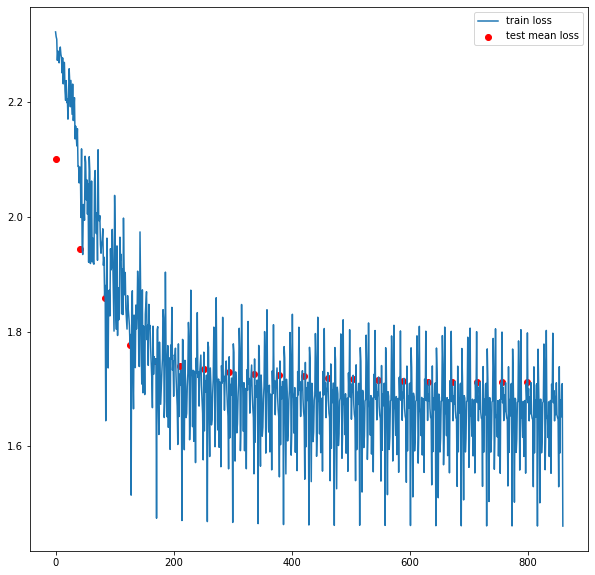

In [29]:
train_log = []
val_log = []

model = Net()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
batchsize = 32

for epoch in range(20):
    train_loss = train(X_train, y_train, opt, model, batchsize=batchsize)
    train_log.extend(train_loss)
    val_log.append(np.mean(test(X_val, y_val, model)))
    clear_output(True)
    plot_history(epoch, train_log, val_log)

#### Задание:

Подсчитать accuracy модели на тестовой выборке (округляйте предсказания по 0.5)

In [30]:
from sklearn.metrics import accuracy_score

preds, labels = [], []
model.eval()
loader = DigitSet(X_val, y_val)
for x_batch, y_batch in loader:
    output = model(torch.Tensor(x_batch).unsqueeze(0))
    preds.append(torch.max(output, dim=1)[1].item())
    labels.append(y_batch.item())
print('accuracy_score: ', accuracy_score(preds, labels))

accuracy_score:  0.7466666666666667
